***WEEK 6 ASSIGNMENT NAMAN***

In [1]:
import pandas as pd
file_path = 'C:/Users/Naman/Downloads/DBSCAN_Data.csv'
data = pd.read_csv(file_path)
data.head()


,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


**DBSCAN ALGO FOR CLUSTERING AND PLOT**

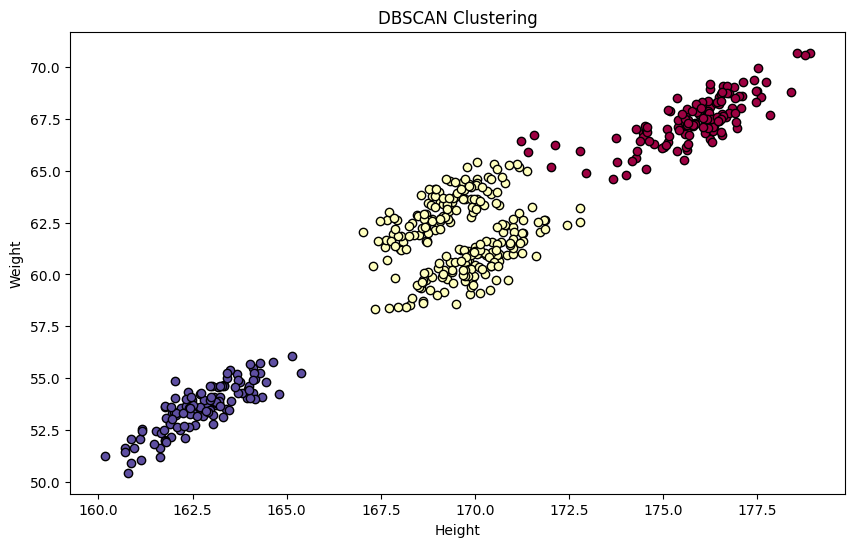

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = data[['Height', 'Weight']].values

def dbscan(X, eps, minPts):
    labels = np.full(X.shape[0], -1) 
    cluster_id = 0
    
    def region_query(point_id):
        point = X[point_id]
        distances = np.linalg.norm(X - point, axis=1)
        neighbors = np.where(distances <= eps)[0]
        return neighbors
    
    def expand_cluster(point_id, neighbors):
        nonlocal cluster_id
        labels[point_id] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_id = neighbors[i]
            if labels[neighbor_id] == -1:  
                labels[neighbor_id] = cluster_id
            elif labels[neighbor_id] == 0:
                labels[neighbor_id] = cluster_id
                new_neighbors = region_query(neighbor_id)
                if len(new_neighbors) >= minPts:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            i += 1
    
    for point_id in range(X.shape[0]):
        if labels[point_id] == -1:
            neighbors = region_query(point_id)
            if len(neighbors) >= minPts:
                cluster_id += 1
                expand_cluster(point_id, neighbors)
    
    return labels

# Set parameters for DBSCAN
eps = 5
minPts = 15

labels = dbscan(X, eps, minPts)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black used for noise.

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()
